# Stack Overflow Survey

## 1. Load dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from matplotlib.ticker import StrMethodFormatter
plt.style.use('./style/minimal.mplstyle')
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [3]:
df_11 = pd.read_csv('data/developer_survey_2011/survey_results_public.csv', header=1, dtype=str)
df_12 = pd.read_csv('data/developer_survey_2012/survey_results_public.csv', header=1, dtype=str)
df_13 = pd.read_csv('data/developer_survey_2013/survey_results_public.csv', header=1, dtype=str)
df_14 = pd.read_csv('data/developer_survey_2014/survey_results_public.csv', header=1, dtype=str)
df_15 = pd.read_csv('data/developer_survey_2015/survey_results_public.csv', header=1, dtype=str)
df_16 = pd.read_csv('data/developer_survey_2016/survey_results_public.csv')
df_17 = pd.read_csv('data/developer_survey_2017/survey_results_public.csv')
df_18 = pd.read_csv('data/developer_survey_2018/survey_results_public.csv')
df_19 = pd.read_csv('data/developer_survey_2019/survey_results_public.csv')
df_20 = pd.read_csv('data/developer_survey_2020/survey_results_public.csv')

In [4]:
df_20.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;Developer, full-stack","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-employed",White or of European descent,Man,"Languages, frameworks, and other technologies I’d be working with;Remote work options;Opportunities for professional development",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work with,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other physical activity;Do other work and come back later,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or software engineering",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who codes);Stack Exchange (public Q&A for a variety of topics);Stack Overflow Jobs (for job seekers),Visit Stack Overflow;Go for a walk or other physical activity,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or software engineering",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office environment or company culture;Opportunities for professional developmen

## 2. Exploratory data analysis

Questions:

1. How many survey respondents per year?
2. How many caffeinated beverages per day?
3. Tabs or spaces? (2015 and 2017)
4. How much do you agree or disagree with the following statement? I want to go to Mars right now, even if there's a chance I never come back.
5. Star Wars or Star Trek?
6. Dogs or cats?
7. Do you believe in aliens?
8. How do you pronouce "GIF"?
9. Are you the "IT support person" for your family?

### 2.1. Selecting responses series

In [5]:
# How many caffeinated beverages per day?
q2 = df_15['How many caffeinated beverages per day?'].value_counts()
q2

0               3916
2               3587
1               2844
3               2492
4               1535
5               1099
6                456
More than 10     219
8                170
7                154
9                 38
Name: How many caffeinated beverages per day?, dtype: int64

In [6]:
# Tabs or spaces?
q3_15 = df_15['Tabs or Spaces'].value_counts()
q3_15

Tabs          11604
Spaces         8663
It depends     4391
Huh?           1149
Name: Tabs or Spaces, dtype: int64

In [7]:
# Tabs or spaces?
q3_17 = df_17['TabsSpaces'].value_counts()
q3_17

Tabs      16682
Spaces    14667
Both       7502
Name: TabsSpaces, dtype: int64

In [8]:
# How much do you agree or disagree with the following statement?
# I want to go to Mars right now, even if there's a chance I never come back.
q4 = df_16['agree_mars'].value_counts()
q4

Disagree completely    21567
Disagree somewhat       6463
Neutral                 5217
Agree completely        4977
Agree somewhat          4461
Name: agree_mars, dtype: int64

In [9]:
# Star Wars or Star Trek?
q5 = df_16['star_wars_vs_star_trek'].value_counts()
q5

Star Wars               22410
Star Trek                8148
Star Wars; Star Trek     3840
Name: star_wars_vs_star_trek, dtype: int64

In [10]:
# Dogs or cats?
q6 = df_16['dogs_vs_cats'].value_counts()
q6

Dogs                      22101
Cats                      15740
Other (please specify)     7398
Name: dogs_vs_cats, dtype: int64

In [11]:
# Do you believe in aliens?
q7 = df_16['aliens'].value_counts()
q7

Yes                       25742
No                        17243
Other (please specify)     6192
Name: aliens, dtype: int64

In [12]:
# How do you pronouce "GIF"?
q8 = df_17['PronounceGIF'].value_counts()
q8

With a hard "g," like "gift"              33484
With a soft "g," like "jiff"              13408
Enunciating each letter: "gee eye eff"     3085
Some other way                             1031
Name: PronounceGIF, dtype: int64

In [13]:
# Are you the "IT support person" for your family?
q9 = df_19['ITperson'].value_counts()
q9

Yes                                         46370
SIGH                                        21819
Also Yes                                    12313
Fortunately, someone else has that title     6639
Name: ITperson, dtype: int64

### 2.2. Adjusting series to plot

In [14]:
# Removing items
q3_15.drop(labels=['Huh?'], inplace=True)

In [15]:
# Adjusting the labels
q3_15.rename({'It depends': 'Both'}, inplace=True)
q5.rename({'Star Wars; Star Trek': 'Both'}, inplace=True)
q6.rename({'Other (please specify)': 'Other'}, inplace=True)
q7.rename({'Other (please specify)': 'Other'}, inplace=True)
q9.rename({'SIGH': 'Sigh'}, inplace=True)

In [16]:
# Adjusting the orders
q2 = q2.reindex(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'More than 10'])
q9 = q9.reindex(['Yes', 'Also Yes', 'Sigh', 'Fortunately, someone else has that title'])

### 2.3. Separating series into values and labels

In [17]:
q1_x = list(range(2011, 2021))

surveys = [df_11, df_12, df_13, df_14, df_15, df_16, df_17, df_18, df_19, df_20]
q1_y = []
for survey in surveys:
    rows = survey.shape[0]
    q1_y.append(rows)

In [18]:
q2_x = q2.index.tolist()
q2_y = q2.to_list()

q4_x = q4.index.tolist()
q4_y = q4.to_list()

q5_x = q5.index.tolist()
q5_y = q5.to_list()

q6_x = q6.index.tolist()
q6_y = q6.to_list()

q7_x = q7.index.tolist()
q7_y = q7.to_list()

q8_x = q8.index.tolist()
q8_y = q8.to_list()

q9_x = q9.index.tolist()
q9_y = q9.to_list()

In [19]:
q3_15.rename('2015', inplace=True)
q3_17.rename('2017', inplace=True)

df_q3 = pd.concat([q3_15, q3_17], axis=1)

q3_x_t = df_q3.loc['Tabs'].tolist()
q3_x_s = df_q3.loc['Spaces'].tolist()
q3_x_b = df_q3.loc['Both'].tolist()

### 2.4. Transforming to percentages

In [52]:
def get_percentage(abs_values):
    '''Receive a list of absolute numbers and transform them into percentages of the total sum.
    
    Parameters:
        abs_values (list of float): A list with absolute numbers.
    
    Return:
        per_values (list of float): A list with the percentage of each absolute number regarding the
            total sum.
    '''
    
    np_abs_values = np.array(abs_values)
    total = np.sum(np_abs_values, axis=0)
    per_values = list(np_abs_values/total)

    return per_values

In [32]:
q2_y_per = get_percentage(q2_y)
q4_y_per = get_percentage(q4_y)
q5_y_per = get_percentage(q5_y)
q6_y_per = get_percentage(q6_y)
q7_y_per = get_percentage(q7_y)
q8_y_per = get_percentage(q8_y)
q9_y_per = get_percentage(q9_y)

In [44]:
q3_x_t_abs = np.array(q3_x_t)
q3_x_s_abs = np.array(q3_x_s)
q3_x_b_abs = np.array(q3_x_b)

total = np.sum([q3_x_t_abs, q3_x_s_abs, q3_x_b_abs], axis=0)

q3_x_t_per = list(q3_x_t_abs / total)
q3_x_s_per = list(q3_x_s_abs / total)
q3_x_b_per = list(q3_x_b_abs / total)

q3_y = df_q3.columns.tolist()

### 2.5. Breaking lines

In [121]:
q2_x = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'More\nthan\n10']

In [72]:
q5_x = ['Star\nWars',
        'Star\nTrek',
        'Both']

In [104]:
q8_x = ['With a hard "g",\nlike "gift"',
        'With a soft "g",\nlike "jiff"',
        'Enunciating each letter:\n"gee eye eff"',
        'Some other way']

In [99]:
q9_x = ['Yes',
        'Also Yes',
        'Sigh',
        'Fortunately, someone\nelse has that title']

## 3. Ploting the charts

In [60]:
def bar_positions(classes, space=1/2):
    '''Calculate the coordinates and size of vertical or horizontal bars, given a desired space between
    them.
    
    Parameters:
        classes (list): List of the major tick labels for the x or y axis. In other words, the classes.
        space (float): The space between bars, in terms of the size (width or height) of them.
    
    Return:
        coordinates (list): List with the x or y coordinates to position the bars.
        size (float): The width of the bar (x axis) or the height of the bar (y axis).
    
    Example:
        Let's say there are 2 classes in the y axis, and we want to generate y coordinates to position them,
        with spaces with 1/4 of their height between them and the axis limits. First, we need to calculate
        the space unit, with the following equation:
        
        space_unit = 1/(1 + 2*(space) + (n_classes - 1)*(1 + space))
        
        Where:
        
        Space unit: The size of a single space. It's the fraction that a bar occupies on an axis with a size
            of 1 and the ammount of space between the bars desired.
        Numerator: The total size of the x or y axis, always 1.
        Denominator: The number of spaces to divide the axis by.
        
        This would give us as a space_unit of 1/2.75. The details of how to calculate the denominator are:
        
        1/4 (from the bottom of the y axis to the bottom of the first bar)
        + 1 (height of the first bar)
        + 1/4 (space between bars)
        + 1 (height of the second bar)
        + 1/4 (from the top of the second bar to the top of the y axis)
        = 2.75
        
        Then, we would need to use the space_unit to calculate the x or y coordinate for each bar, with the
        following equation:
        
        coordinate = space_unit*(1/2 + space + i*(1 + space))
        
        If we are calculating the y coordinate for the second bar, it would be:
        
        1/4 (from the bottom of the y axis to the bottom of the first bar)
        + 1 (height of the first bar)
        + 1/4 (space between bars)
        + 1/2 (half of the height of the second bar)
        = 2
    '''
    
    n_classes = len(classes)
    space_unit = 1/(1 + 2*(space) + (n_classes - 1)*(1 + space))
    
    coordinates = []  # list with the coordinate of every bar
    for i in range(n_classes):
        coordinates.append(space_unit*(1/2 + space + i*(1 + space)))  # calculate the coordinate to position the bar

    size = space_unit
    
    return coordinates, size

In [39]:
def annotate_plot(text, x, y, xytext_x, ha):
    plt.annotate(text,  # This is the text
                 (x, y),  # These are the coordinates to position the label
                 textcoords='offset points',  # How to position the text
                 xytext=(xytext_x, 0),  # Distance from text to points (x, y)
                 ha=ha,  # Horizontal alignment can be left, right or center
                 va='center',  # Vertical alignment can be left, right or center
                 color='#777777',
                 fontsize=11)
    return

In [42]:
# Titles
t1 = 'How many survey respondents per year?'
t2 = 'How many caffeinated beverages per day?'
t3 = 'Tabs or spaces?'
t4 = '''How much do you agree or disagree with the following statement? I want to go to Mars right now, even if there's a chance I never come back.'''
t5 = 'Star Wars or Star Trek?'
t6 = 'Dogs or cats?'
t7 = 'Do you believe in aliens?'
t8 = 'How do you pronouce "GIF"?'
t9 = 'Are you the "IT support person" for your family?'

### 3.1. Survey respondents

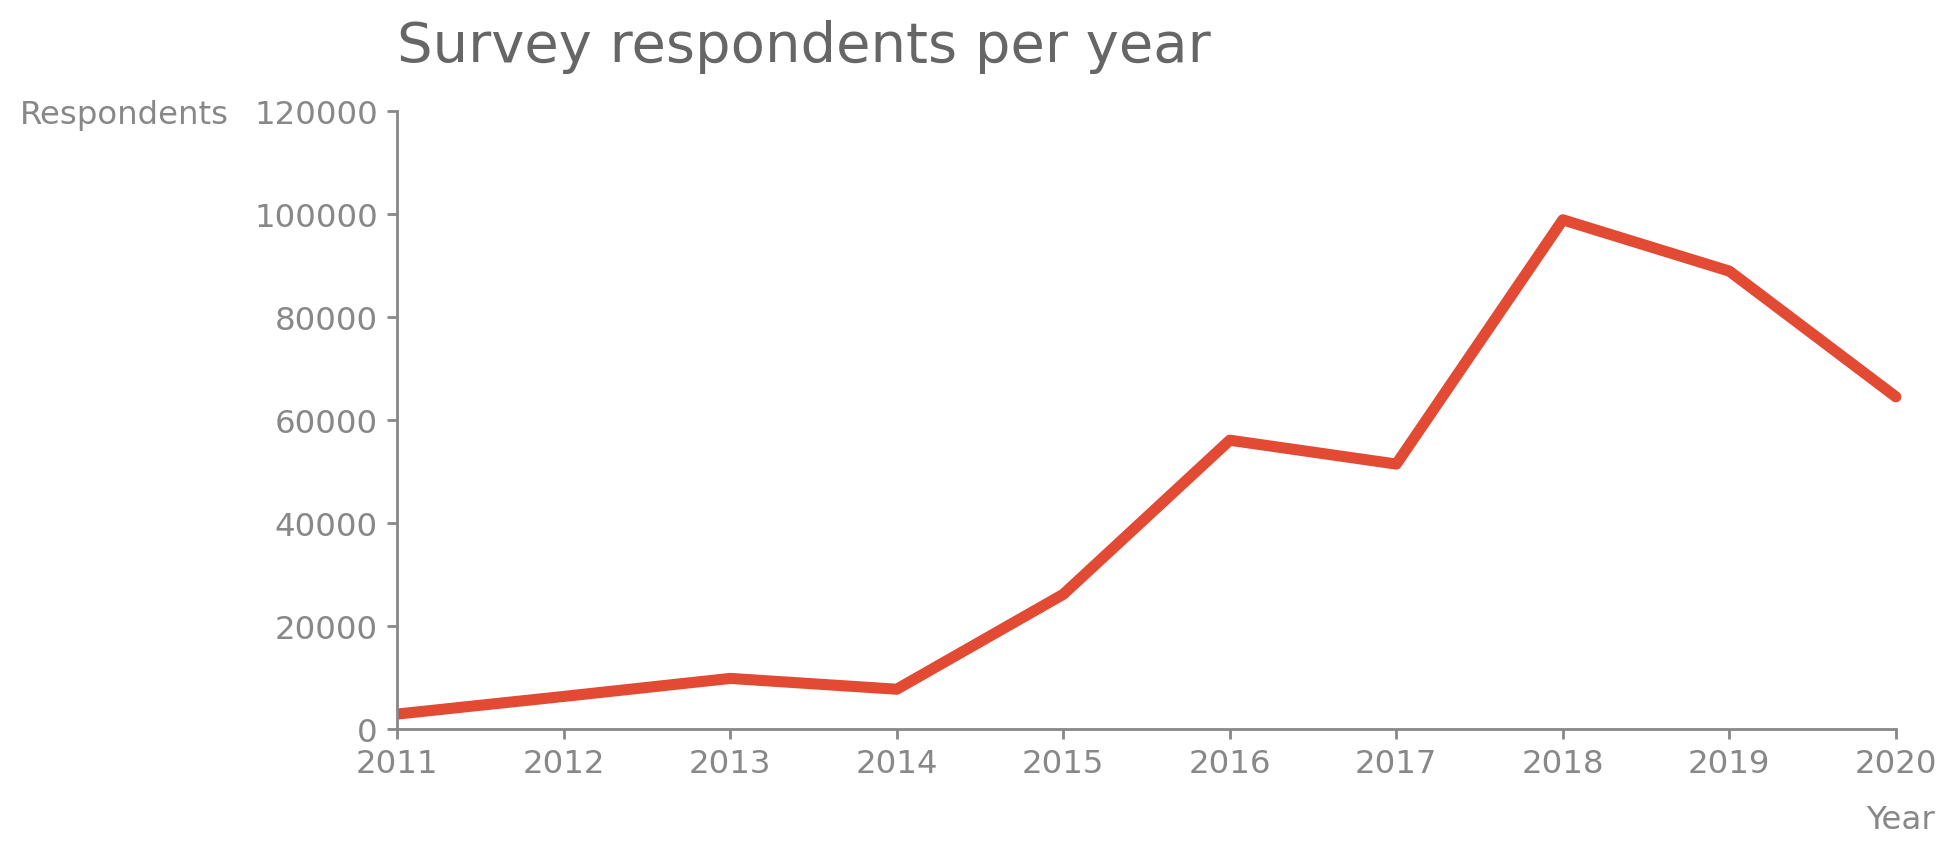

In [58]:
plt.figure(figsize=(10, 4.5))

plt.plot(q1_x, q1_y, solid_capstyle='round')  # Round the end of the line

plt.gca().spines['bottom'].set_bounds((2011, 2020))  # Hide the spine inside the 0.1 x axis margin
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))  # Show every major tick on the x axis
plt.title('Survey respondents per year')
plt.xlabel('Year', va='top', ha='right', x=1.015)  # Right align 'Year' to 2020
plt.ylabel('Respondents', rotation='horizontal', va='top', ha='right', y=1.02)  # Vertically align 'Respondents' to 120000
plt.xlim(2011, 2020.1)  # Add a 0.1 margin to avoid trimming the round end of the line
plt.ylim(0, 120000)

plt.tight_layout(h_pad=4, w_pad=4)
plt.show()

### 3.2. Caffeinated beverages

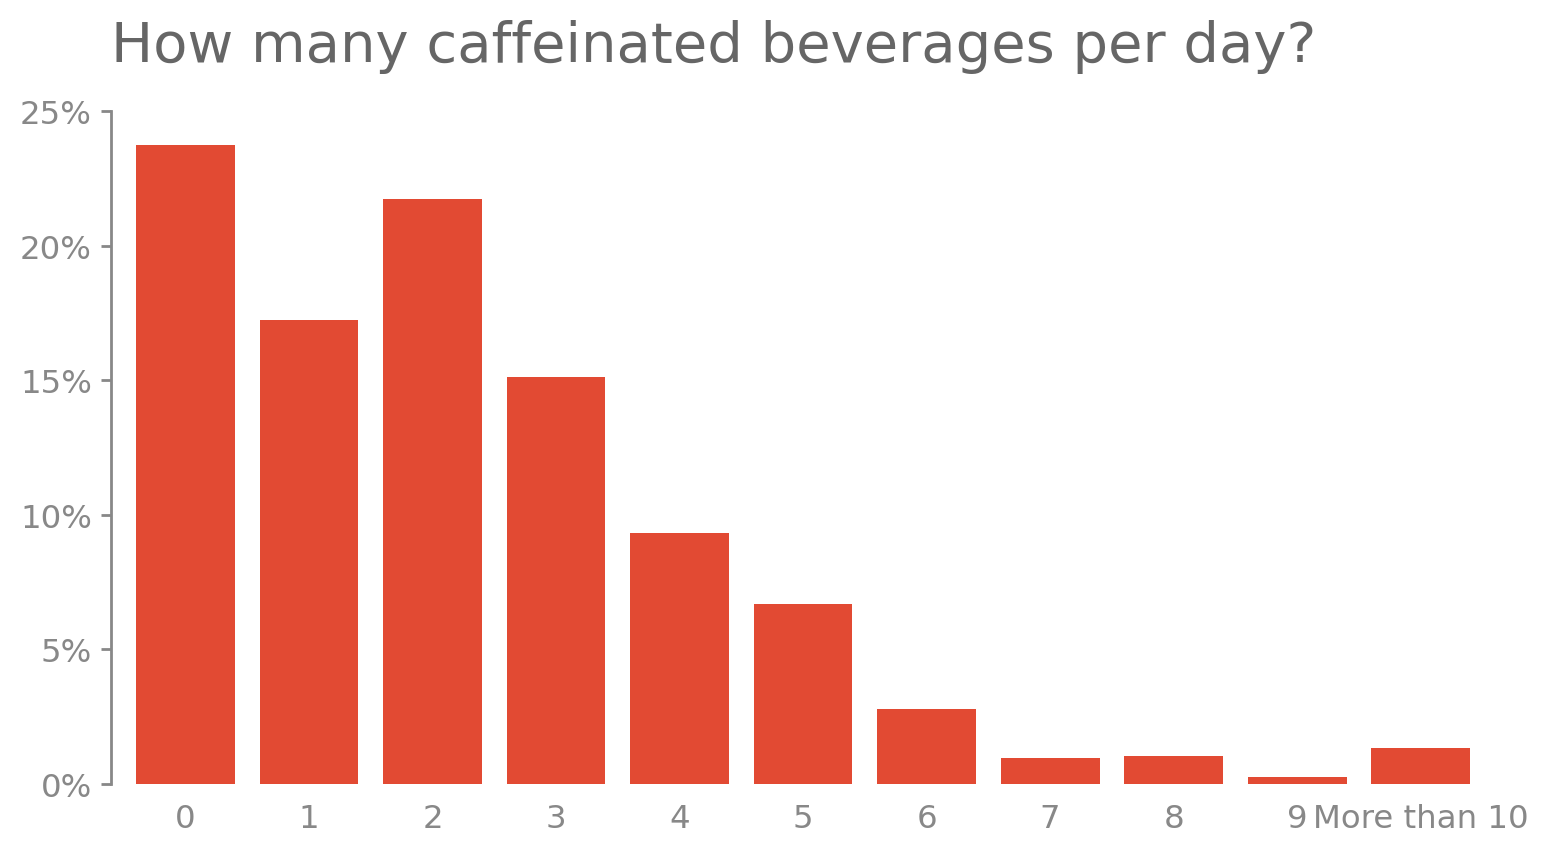

In [61]:
q2_coordinates, q2_size = bar_positions(q2_x, 1/4)

plt.bar(q2_coordinates, q2_y_per, width=q2_size)

plt.gca().spines['bottom'].set_visible(False)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0%}'))
plt.gca().tick_params(bottom=False, width=1)
plt.xticks(q2_coordinates, q2_x)
plt.title(t2)
plt.xlim(0, 1)
plt.ylim(0, 0.25)

plt.tight_layout(h_pad=4, w_pad=4)
plt.show()

### 3.3. Tabs or spaces

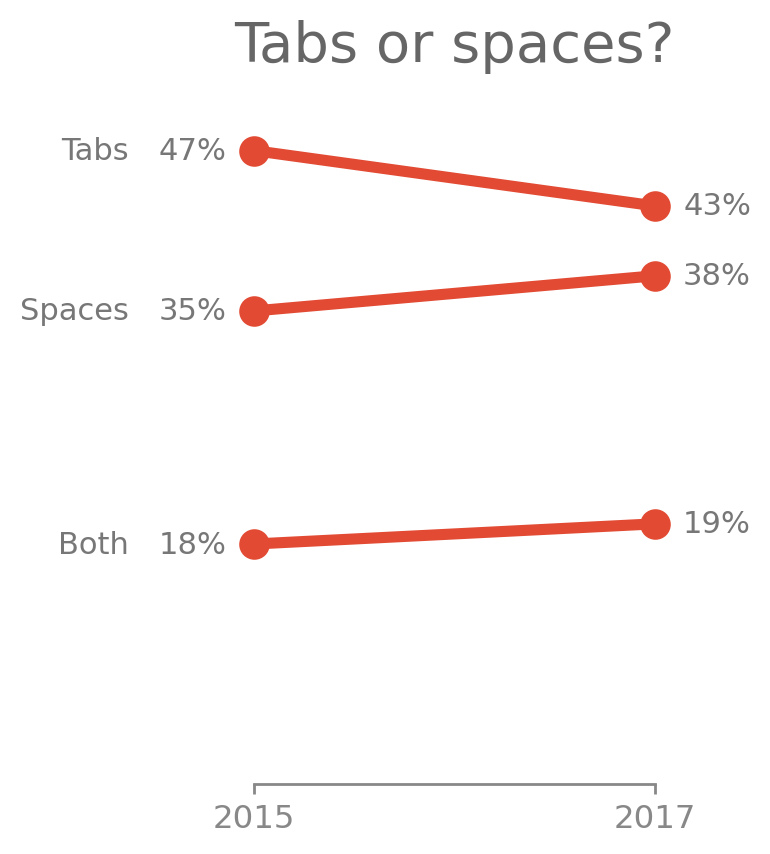

In [65]:
plt.figure(figsize=(4, 4.5))

plt.gca().set_prop_cycle(color=['E24A33', 'E24A33', 'E24A33'])

plt.plot(q3_y, q3_x_t_per, 'o-', markersize=10)
plt.plot(q3_y, q3_x_s_per, 'o-', markersize=10)
plt.plot(q3_y, q3_x_b_per, 'o-', markersize=10)

plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_bounds((0, 1))
plt.gca().get_yaxis().set_visible(False)
plt.ylim(0, 0.5)
plt.margins(x=0.05)
plt.tick_params(left=False, width=1)
plt.title(t3)

legends = ['Tabs', 'Spaces', 'Both']
labels = [zip(q3_y, q3_x_t_per), zip(q3_y, q3_x_s_per), zip(q3_y, q3_x_b_per)]
items = zip(labels, legends)
i = 1
for item in items:
    labels = item[0]
    legend = item[1]
    
    for x, y in labels:
        label = '{:.0%}'.format(y)
        
        if i % 2 != 0:
            annotate_plot(label, x, y, -10, 'right')
            annotate_plot(legend, x, y, -45, 'right')
        else:
            annotate_plot(label, x, y, 10, 'left')
        i += 1

plt.tight_layout(h_pad=4, w_pad=4)
plt.show()

### 3.4. Desire to go to Mars

### 3.5. Star Wars or Star Trek

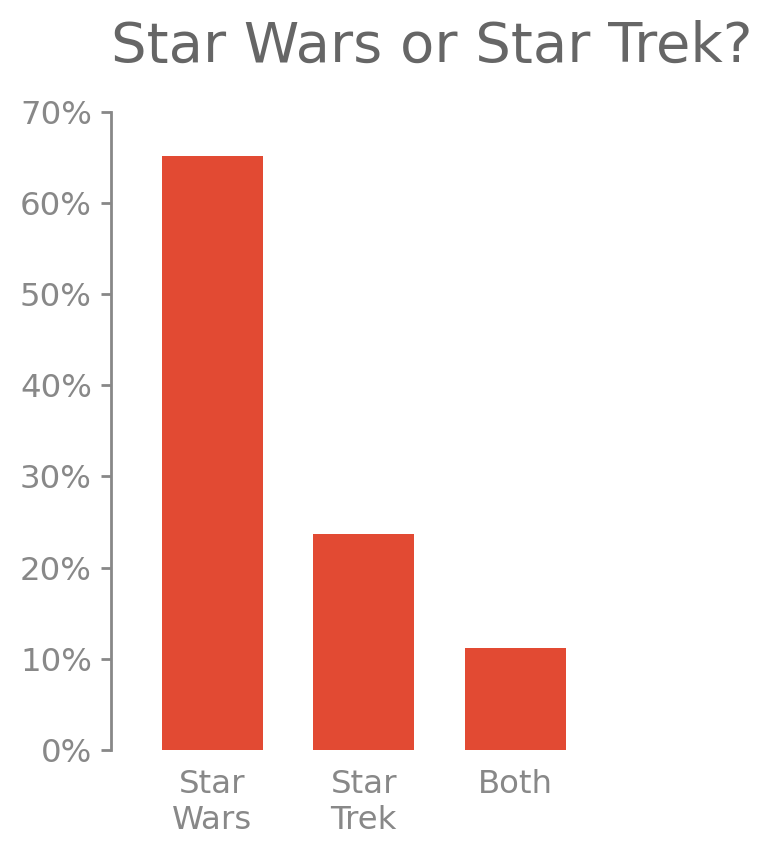

In [81]:
q5_coordinates, q5_size = bar_positions(q5_x, 1/2)

plt.figure(figsize=(3.4, 4.5))

plt.bar(q5_coordinates, q5_y_per, width=q5_size)

plt.gca().spines['bottom'].set_visible(False)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0%}'))
plt.gca().tick_params(bottom=False, width=1)
plt.xticks(q5_coordinates, q5_x)
plt.title(t5)
plt.xlim(0, 1)
plt.ylim(0, 0.7)

plt.tight_layout(h_pad=4, w_pad=4)
plt.show()

### 3.6. Dogs or cats

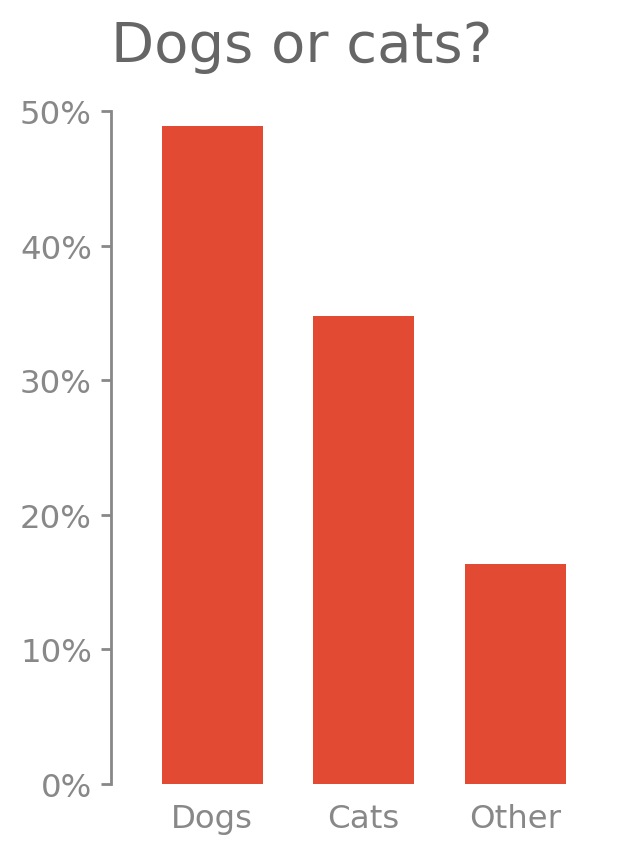

In [82]:
q6_coordinates, q6_size = bar_positions(q6_x, 1/2)

plt.figure(figsize=(3.4, 4.5))

plt.bar(q6_coordinates, q6_y_per, width=q6_size)

plt.gca().spines['bottom'].set_visible(False)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0%}'))
plt.gca().tick_params(bottom=False, width=1)
plt.xticks(q6_coordinates, q6_x)
plt.title(t6)
plt.xlim(0, 1)
plt.ylim(0, 0.5)

plt.tight_layout(h_pad=4, w_pad=4)
plt.show()

### 3.7. Aliens belief

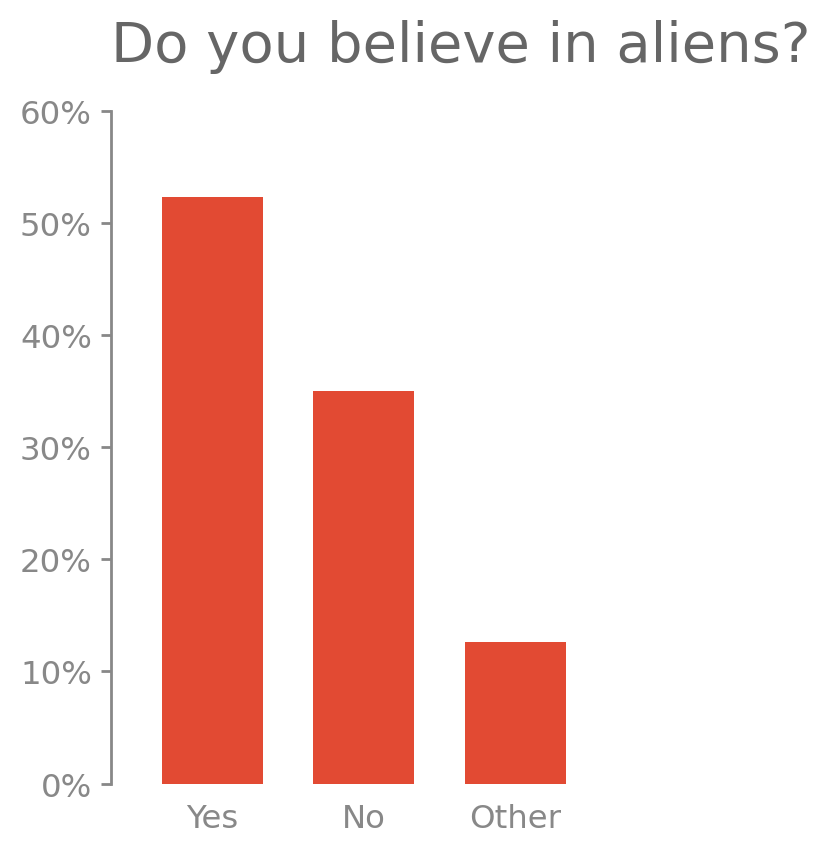

In [87]:
q7_coordinates, q7_size = bar_positions(q7_x, 1/2)

plt.figure(figsize=(3.4, 4.5))

plt.bar(q7_coordinates, q7_y_per, width=q7_size)

plt.gca().spines['bottom'].set_visible(False)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0%}'))
plt.gca().tick_params(bottom=False, width=1)
plt.xticks(q7_coordinates, q7_x)
plt.title(t7)
plt.xlim(0, 1)
plt.ylim(0, 0.6)

plt.tight_layout(h_pad=4, w_pad=4)
plt.show()

### 3.8. GIF pronunciation

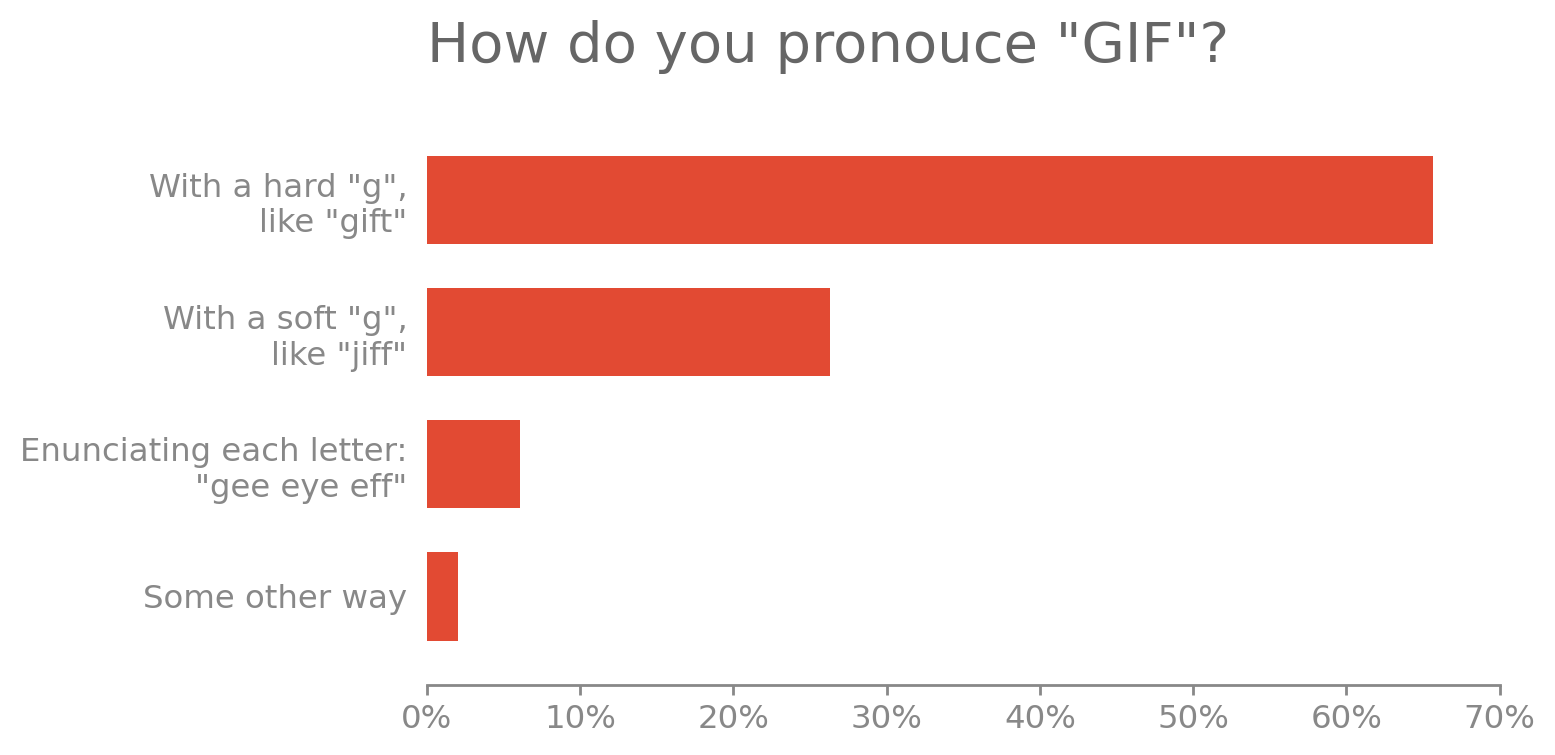

In [117]:
q8_coordinates, q8_size = bar_positions(q8_x, 1/2)

plt.figure(figsize=(8, 4))

plt.barh(q8_coordinates[::-1], q8_y_per, height=q8_size)

plt.gca().spines['left'].set_visible(False)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0%}'))
plt.gca().tick_params(left=False, width=1)
plt.yticks(q8_coordinates[::-1], q8_x)
plt.title(t8)
plt.xlim(0, 0.7)
plt.ylim(0, 1)

plt.tight_layout(h_pad=4, w_pad=4)
plt.show()

### 3.9. IT support person

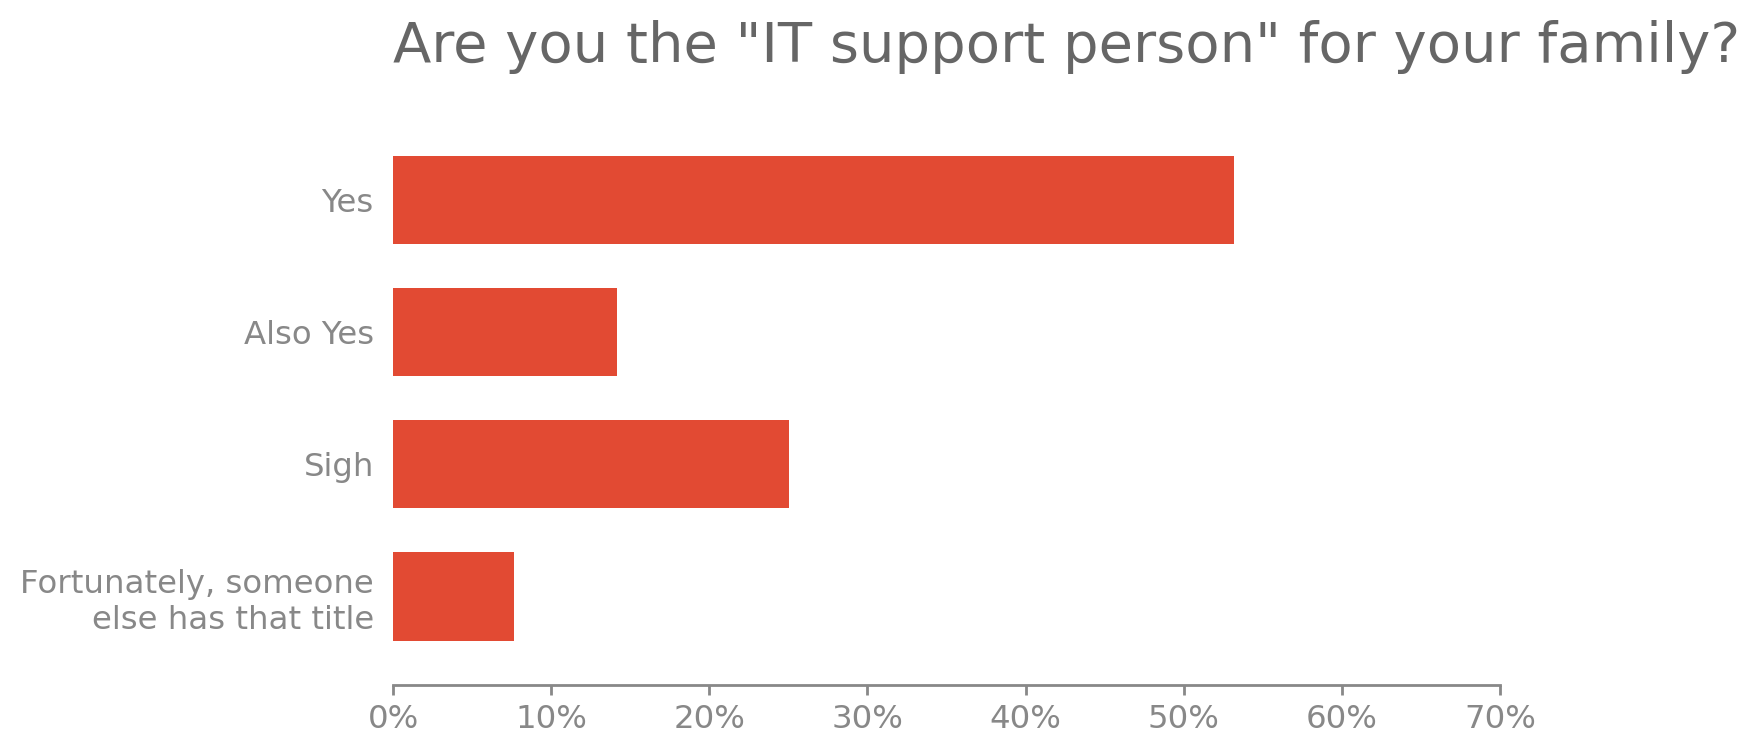

In [118]:
q9_coordinates, q9_size = bar_positions(q9_x, 1/2)

plt.figure(figsize=(8, 4))

plt.barh(q9_coordinates[::-1], q9_y_per, height=q9_size)

plt.gca().spines['left'].set_visible(False)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0%}'))
plt.gca().tick_params(left=False, width=1)
plt.yticks(q9_coordinates[::-1], q9_x)
plt.title(t9)
plt.xlim(0, 0.7)
plt.ylim(0, 1)

plt.tight_layout(h_pad=4, w_pad=4)
plt.show()